In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, LGBMRegressor
from pathlib import Path
import pandas as pd
import warnings
import requests
# import datetime ########## from datetime import datetime으로 변경
from datetime import datetime
import optuna ########## 사용하지 않으므로 삭제
import json
import copy
import os
#import optuna

# 데이터 로드

In [164]:

print('!!!!!!!!!!!!!!! Start park_analysis.py !!!!!!!!!!!!!!!')
path = Path.cwd().parent
raw_data = str(path) + '/raw_data/'
data = str(path) + '/data/'
result = str(path) + '/result_data/'

warnings.filterwarnings(action='ignore')

# 데이터 로드
print(datetime.now().strftime('%Y.%m.%d %Hh%Mm%Ss'), 'Load Data')
df = pd.read_csv(data+'dataset.csv')
df["주차장"].astype("category")

predict_df = pd.read_csv(data+'predict_dataset.csv')

# train, test 나누기
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42)

X_train, y_train = train_data.drop('혼잡도', axis=1), train_data['혼잡도']
X_test, y_test = test_data.drop('혼잡도', axis=1), test_data['혼잡도']

!!!!!!!!!!!!!!! Start park_analysis.py !!!!!!!!!!!!!!!
2022.12.27 16h44m24s Load Data


# LGBM

## 파라미터 튜닝

[I 2022-12-27 16:44:24,913] A new study created in memory with name: no-name-fc2c2938-2f60-440c-afdd-0d678c37dc09
[I 2022-12-27 16:44:40,258] Trial 0 finished with value: 0.8691410662665608 and parameters: {'boosting_type': 'goss', 'max_depth': 16, 'num_leaves': 467, 'min_child_samples': 22, 'learning_rate': 0.065768555679076, 'reg_alpha': 0.15221837180309236, 'reg_lambda': 0.4708779656856107, 'feature_fraction': 0.7}. Best is trial 0 with value: 0.8691410662665608.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


[I 2022-12-27 16:44:52,223] Trial 1 finished with value: 0.9095069545420313 and parameters: {'boosting_type': 'goss', 'max_depth': 28, 'num_leaves': 362, 'min_child_samples': 31, 'learning_rate': 0.09390080636904861, 'reg_alpha': 0.5903642959349066, 'reg_lambda': 0.20548882077786162, 'feature_fraction': 0.7}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


[I 2022-12-27 16:44:54,996] Trial 2 finished with value: 0.8226895916487565 and parameters: {'boosting_type': 'goss', 'max_depth': 7, 'num_leaves': 872, 'min_child_samples': 21, 'learning_rate': 0.061244581538782324, 'reg_alpha': 0.454899782198655, 'reg_lambda': 0.13743931064815487, 'feature_fraction': 0.9}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


[I 2022-12-27 16:45:17,105] Trial 3 finished with value: 0.5474565666981421 and parameters: {'boosting_type': 'goss', 'max_depth': 28, 'num_leaves': 755, 'min_child_samples': 27, 'learning_rate': 0.028209484673432518, 'reg_alpha': 0.2884791686343786, 'reg_lambda': 0.2531225874145552, 'feature_fraction': 0.7}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


[I 2022-12-27 16:45:24,879] Trial 4 finished with value: 0.8940308537199994 and parameters: {'boosting_type': 'goss', 'max_depth': 20, 'num_leaves': 203, 'min_child_samples': 13, 'learning_rate': 0.08350609303837736, 'reg_alpha': 0.32939810690920257, 'reg_lambda': 0.40461197245457964, 'feature_fraction': 0.8}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


[I 2022-12-27 16:45:41,255] Trial 5 finished with value: 0.5470568470811779 and parameters: {'boosting_type': 'goss', 'max_depth': 20, 'num_leaves': 513, 'min_child_samples': 9, 'learning_rate': 0.017569792446601985, 'reg_alpha': 0.5142571423678722, 'reg_lambda': 0.9465490344039582, 'feature_fraction': 0.8}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


[I 2022-12-27 16:45:49,869] Trial 6 finished with value: 0.5470568470811779 and parameters: {'boosting_type': 'goss', 'max_depth': 10, 'num_leaves': 374, 'min_child_samples': 22, 'learning_rate': 0.018609107632666995, 'reg_alpha': 0.536125987933307, 'reg_lambda': 0.40032703805049924, 'feature_fraction': 0.8}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


[I 2022-12-27 16:46:13,337] Trial 7 finished with value: 0.6527508240596451 and parameters: {'boosting_type': 'goss', 'max_depth': 14, 'num_leaves': 970, 'min_child_samples': 14, 'learning_rate': 0.05320753963012074, 'reg_alpha': 0.764894964147908, 'reg_lambda': 0.36915749649474483, 'feature_fraction': 0.6}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


[I 2022-12-27 16:46:17,441] Trial 8 finished with value: 0.5472016730293533 and parameters: {'boosting_type': 'goss', 'max_depth': 30, 'num_leaves': 92, 'min_child_samples': 48, 'learning_rate': 0.03316433674946228, 'reg_alpha': 0.15702821093721292, 'reg_lambda': 0.027361459096954387, 'feature_fraction': 0.7}. Best is trial 1 with value: 0.9095069545420313.


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


[I 2022-12-27 16:46:18,996] Trial 9 finished with value: 0.5489917217488023 and parameters: {'boosting_type': 'goss', 'max_depth': 21, 'num_leaves': 17, 'min_child_samples': 39, 'learning_rate': 0.047076393075153246, 'reg_alpha': 0.7774687490431292, 'reg_lambda': 0.8011345411101922, 'feature_fraction': 0.6}. Best is trial 1 with value: 0.9095069545420313.


study.best_params: 0.9095069545420313
Number of finished trials: 10
Best trial: {'boosting_type': 'goss', 'max_depth': 28, 'num_leaves': 362, 'min_child_samples': 31, 'learning_rate': 0.09390080636904861, 'reg_alpha': 0.5903642959349066, 'reg_lambda': 0.20548882077786162, 'feature_fraction': 0.7}
study.best_params: {'boosting_type': 'goss', 'max_depth': 28, 'num_leaves': 362, 'min_child_samples': 31, 'learning_rate': 0.09390080636904861, 'reg_alpha': 0.5903642959349066, 'reg_lambda': 0.20548882077786162, 'feature_fraction': 0.7}


array([<AxesSubplot:xlabel='boosting_type', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='feature_fraction'>,
       <AxesSubplot:xlabel='learning_rate'>,
       <AxesSubplot:xlabel='max_depth'>,
       <AxesSubplot:xlabel='min_child_samples'>,
       <AxesSubplot:xlabel='num_leaves'>,
       <AxesSubplot:xlabel='reg_alpha'>,
       <AxesSubplot:xlabel='reg_lambda'>], dtype=object)

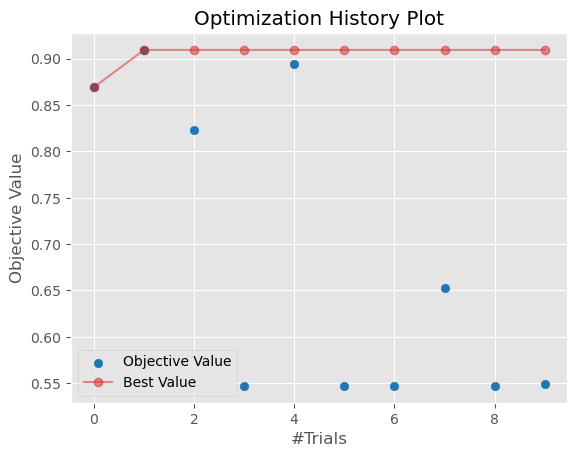

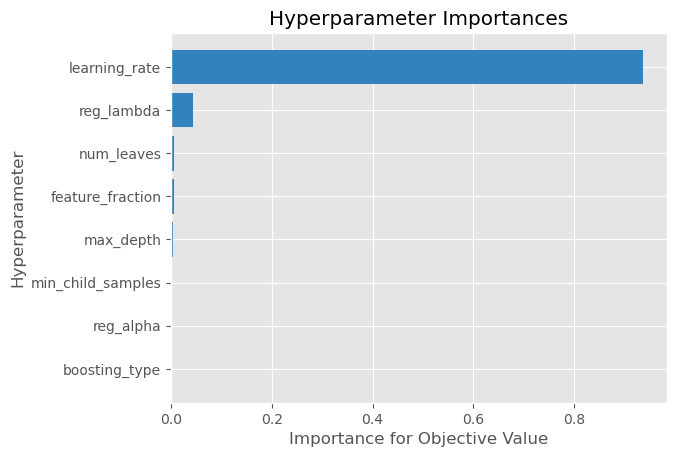

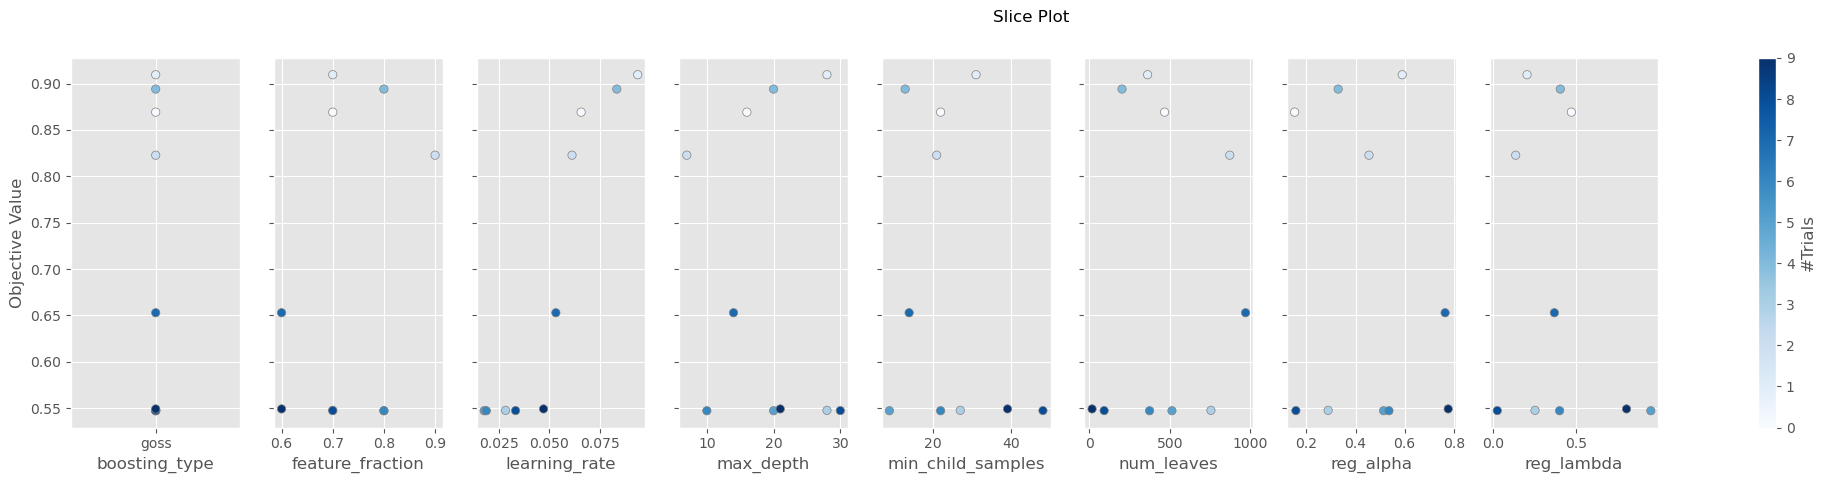

In [165]:
def objective(trial):
    param = {
        'boosting_type' :  trial.suggest_categorical('boosting_type', ['goss']),
        'max_depth' : trial.suggest_int('max_depth', 3, 30),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 1000),
        'min_child_samples':trial.suggest_int('min_child_samples',5,50 ),
        'learning_rate':trial.suggest_uniform('learning_rate', 0.01,0.1),
        'n_estimators' :10,
        'reg_alpha':trial.suggest_uniform('reg_alpha', 0.001,1),
        'reg_lambda':trial.suggest_uniform('reg_lambda', 0.001,1),
        'feature_fraction' :  trial.suggest_categorical('feature_fraction', [0.6,0.7,0.8,0.9])
    }

    lgbm_reg = LGBMClassifier(**param)
    lgbm_reg.fit(X_train,y_train,categorical_feature =['주차장'],verbose=False)
    pred = lgbm_reg.predict(X_test)
    score = accuracy_score(y_test, pred)
    return score

studyLGBM = optuna.create_study(direction='maximize')
studyLGBM.optimize(lambda trial : objective(trial), n_trials = 10)

print('study.best_params:', studyLGBM.best_trial.value)
print('Number of finished trials:', len(studyLGBM.trials))
print('Best trial:', studyLGBM.best_trial.params)
print('study.best_params:', studyLGBM.best_params)
parameter = studyLGBM.best_params
optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프
optuna.visualization.matplotlib.plot_slice(studyLGBM)

## 모델적합

In [166]:
parameter

{'boosting_type': 'goss',
 'max_depth': 28,
 'num_leaves': 362,
 'min_child_samples': 31,
 'learning_rate': 0.09390080636904861,
 'reg_alpha': 0.5903642959349066,
 'reg_lambda': 0.20548882077786162,
 'feature_fraction': 0.7}

In [167]:

import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
# 모델 적합
print(datetime.now().strftime('%Y.%m.%d %Hh%Mm%Ss'), 'Fit Model')
model = LGBMClassifier(**parameter,randomstate = 42) ######## 실행할 때마다 결과가 바뀌면 안 됨 --> random_state 지정
model.fit(X_train, y_train, categorical_feature=['주차장'], eval_set=(X_test,y_test), verbose= 10)
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
# 적합된 모델로 혼잡도 예측

2022.12.27 16h46m19s Fit Model
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[10]	valid_0's multi_logloss: 0.511548
[20]	valid_0's multi_logloss: 0.322372
[30]	valid_0's multi_logloss: 0.238403
[40]	valid_0's multi_logloss: 0.193412
[50]	valid_0's multi_logloss: 0.160798
[60]	valid_0's multi_logloss: 0.138159
[70]	valid_0's multi_logloss: 0.121861
[80]	valid_0's multi_logloss: 0.109375
[90]	valid_0's multi_logloss: 0.100036
[100]	valid_0's multi_logloss: 0.0921564
time : 110.51154613494873


In [168]:
predict = pd.DataFrame(model.predict(X_test))
result = pd.concat([y_test.reset_index(),predict],axis = 1)
result= result[['혼잡도',0]]
result.columns =['actual','predict']

acc = accuracy_score(result['actual'], result['predict'])

In [169]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


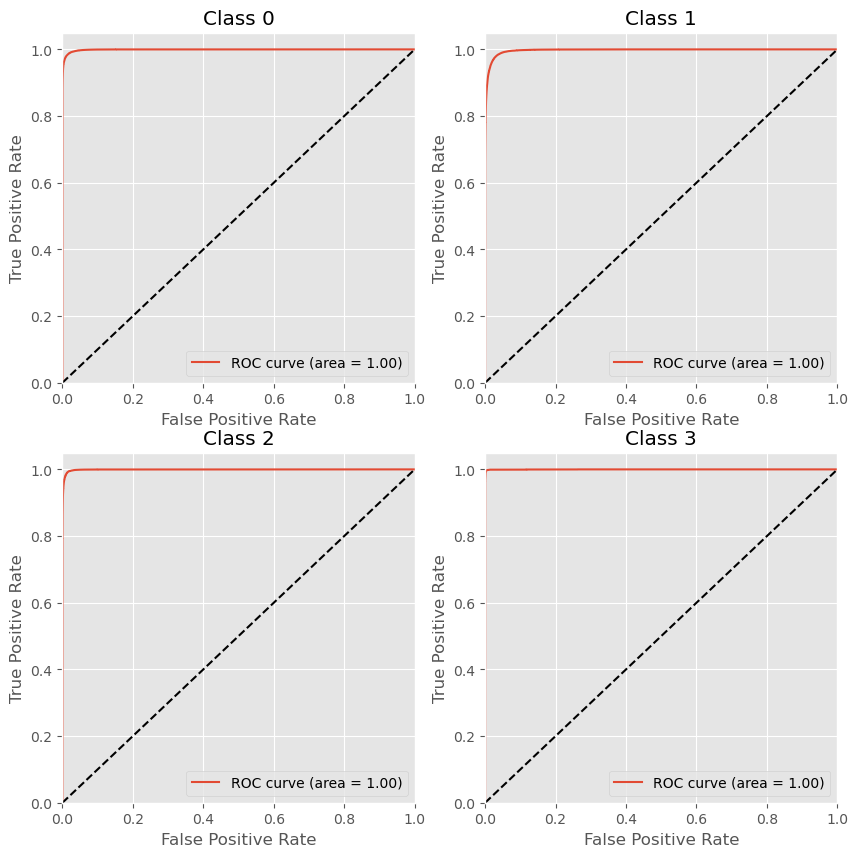

roc_auc_score:  0.9988263158242818
accuracy 0.9750377995724738


In [170]:
labels = [0, 1, 2, 3]
y_test_roc = label_binarize(y_test, classes=labels)
y_pred = model.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(10, 10))
for idx, i in enumerate(range(n_classes)):
    idx = idx+1
    plt.subplot(2,2,idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % (idx-1))
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_roc, y_pred, multi_class='raise'))
print(f'accuracy {acc}')


# XGboost

In [171]:
from xgboost import XGBClassifier
import xgboost

[I 2022-12-27 16:48:15,868] A new study created in memory with name: no-name-fb3d0cd2-14f8-42a2-8fe9-20f9bd2b5c91


[16:48:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:18] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:48:39,870] Trial 0 finished with value: 0.977499840691457 and parameters: {'max_depth': 27, 'num_leaves': 354, 'min_child_samples': 18, 'learning_rate': 0.025412937359246834, 'reg_alpha': 0.6849315891616037, 'reg_lambda': 0.4290622695987983, 'feature_fraction': 0.7}. Best is trial 0 with value: 0.977499840691457.


[16:48:39] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:48:46,641] Trial 1 finished with value: 0.8465598044270396 and parameters: {'max_depth': 8, 'num_leaves': 721, 'min_child_samples': 24, 'learning_rate': 0.03085833319977195, 'reg_alpha': 0.21339252394351885, 'reg_lambda': 0.645475784481229, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.977499840691457.


[16:48:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:49:07,240] Trial 2 finished with value: 0.9761964071578777 and parameters: {'max_depth': 21, 'num_leaves': 364, 'min_child_samples': 21, 'learning_rate': 0.05062348013756754, 'reg_alpha': 0.8645030700004009, 'reg_lambda': 0.11552092719502519, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.977499840691457.


[16:49:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:49:11,902] Trial 3 finished with value: 0.788348462817386 and parameters: {'max_depth': 6, 'num_leaves': 357, 'min_child_samples': 24, 'learning_rate': 0.010823016956855266, 'reg_alpha': 0.9026806144630499, 'reg_lambda': 0.9342767802902222, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.977499840691457.


[16:49:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:12] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:49:17,476] Trial 4 finished with value: 0.8359469589447402 and parameters: {'max_depth': 7, 'num_leaves': 861, 'min_child_samples': 10, 'learning_rate': 0.04033740048784177, 'reg_alpha': 0.5658165872766467, 'reg_lambda': 0.6515612261869744, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.977499840691457.


[16:49:17] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:18] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:49:23,153] Trial 5 finished with value: 0.8367000538752527 and parameters: {'max_depth': 7, 'num_leaves': 16, 'min_child_samples': 40, 'learning_rate': 0.0794317263470713, 'reg_alpha': 0.893069156249147, 'reg_lambda': 0.7693747568813655, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.977499840691457.


[16:49:23] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:49:48,086] Trial 6 finished with value: 0.9774650824638949 and parameters: {'max_depth': 27, 'num_leaves': 888, 'min_child_samples': 7, 'learning_rate': 0.04775550660649334, 'reg_alpha': 0.7628470928523515, 'reg_lambda': 0.6586305517918898, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.977499840691457.


[16:49:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:49:50,929] Trial 7 finished with value: 0.7489615979515818 and parameters: {'max_depth': 4, 'num_leaves': 423, 'min_child_samples': 21, 'learning_rate': 0.08981305953798853, 'reg_alpha': 0.342074142301528, 'reg_lambda': 0.9799423655499416, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.977499840691457.


[16:49:51] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:49:52] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:50:07,063] Trial 8 finished with value: 0.9448502789347761 and parameters: {'max_depth': 15, 'num_leaves': 138, 'min_child_samples': 6, 'learning_rate': 0.019079640032376464, 'reg_alpha': 0.14954010658176572, 'reg_lambda': 0.1896947602574082, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.977499840691457.


[16:50:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:50:09] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-27 16:50:28,059] Trial 9 finished with value: 0.9748726979915537 and parameters: {'max_depth': 21, 'num_leaves': 456, 'min_child_samples': 11, 'learning_rate': 0.021754092712782037, 'reg_alpha': 0.348786226380104, 'reg_lambda': 0.68358788048711, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.977499840691457.


study.best_params: 0.977499840691457
Number of finished trials: 10
Best trial: {'max_depth': 27, 'num_leaves': 354, 'min_child_samples': 18, 'learning_rate': 0.025412937359246834, 'reg_alpha': 0.6849315891616037, 'reg_lambda': 0.4290622695987983, 'feature_fraction': 0.7}
study.best_params: {'max_depth': 27, 'num_leaves': 354, 'min_child_samples': 18, 'learning_rate': 0.025412937359246834, 'reg_alpha': 0.6849315891616037, 'reg_lambda': 0.4290622695987983, 'feature_fraction': 0.7}


array([<AxesSubplot:xlabel='feature_fraction', ylabel='Objective Value'>,
       <AxesSubplot:xlabel='learning_rate'>,
       <AxesSubplot:xlabel='max_depth'>,
       <AxesSubplot:xlabel='min_child_samples'>,
       <AxesSubplot:xlabel='num_leaves'>,
       <AxesSubplot:xlabel='reg_alpha'>,
       <AxesSubplot:xlabel='reg_lambda'>], dtype=object)

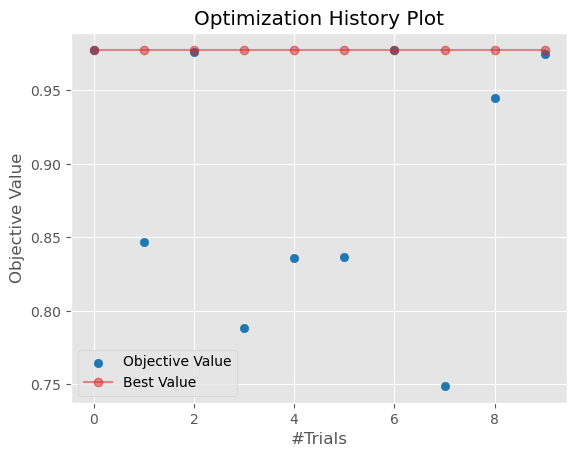

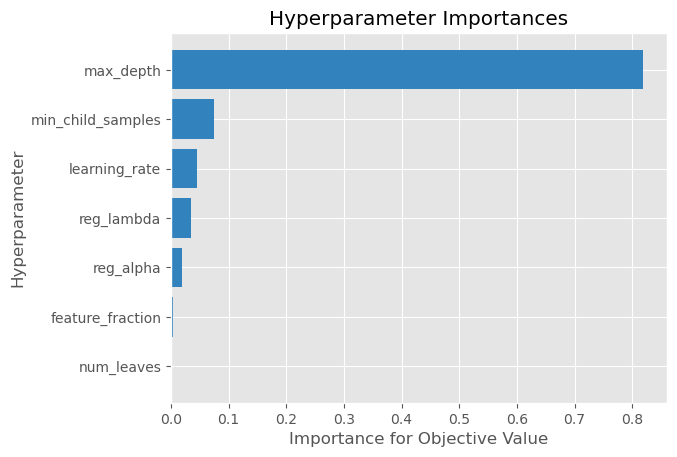

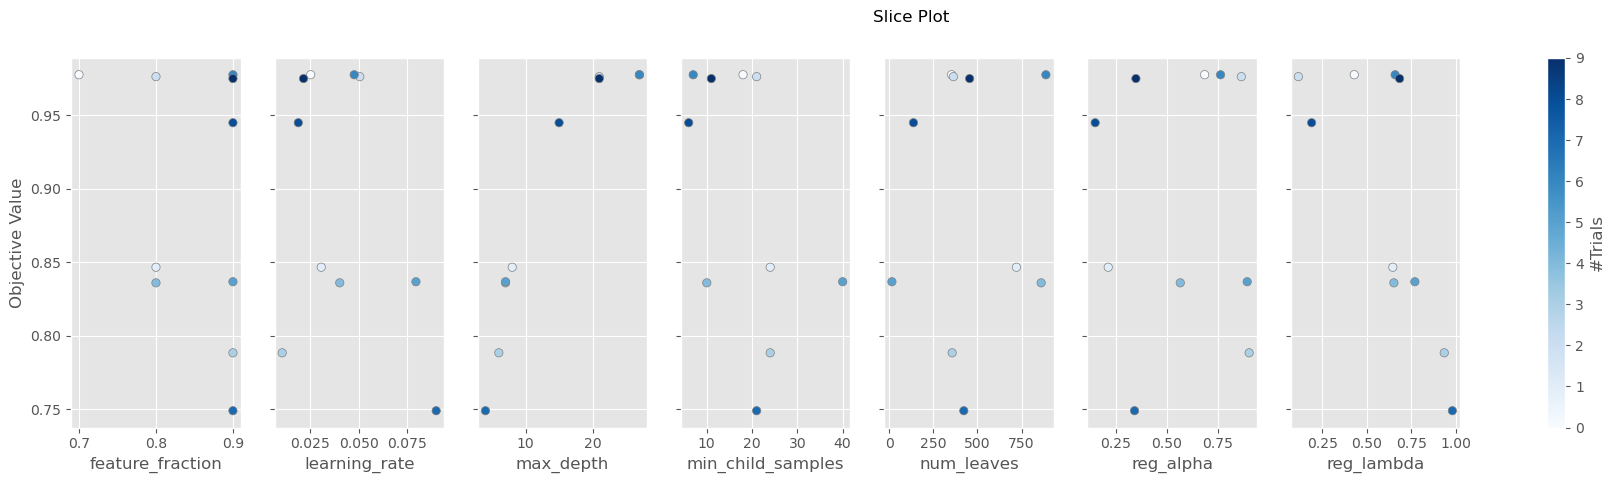

In [172]:
def objective(trial):
    param = {
        #'boosting_type' :  trial.suggest_categorical('boosting_type', ['goss']),
        'max_depth' : trial.suggest_int('max_depth', 3, 30),
        'num_leaves' : trial.suggest_int('num_leaves', 2, 1000),
        'min_child_samples':trial.suggest_int('min_child_samples',5,50 ),
        'learning_rate':trial.suggest_uniform('learning_rate', 0.01,0.1),
        'n_estimators' :10,
        'reg_alpha':trial.suggest_uniform('reg_alpha', 0.001,1),
        'reg_lambda':trial.suggest_uniform('reg_lambda', 0.001,1),
        'feature_fraction' :  trial.suggest_categorical('feature_fraction', [0.6,0.7,0.8,0.9])
    }

    xgb_classifier = XGBClassifier(**param)
    xgb_classifier.fit(X_train,y_train,verbose=False)
    pred = xgb_classifier.predict(X_test)
    score = accuracy_score(y_test, pred)
    return score

studyLGBM = optuna.create_study(direction='maximize')
studyLGBM.optimize(lambda trial : objective(trial), n_trials = 10)

print('study.best_params:', studyLGBM.best_trial.value)
print('Number of finished trials:', len(studyLGBM.trials))
print('Best trial:', studyLGBM.best_trial.params)
print('study.best_params:', studyLGBM.best_params)
parameter = studyLGBM.best_params
optuna.visualization.matplotlib.plot_optimization_history(studyLGBM)
optuna.visualization.matplotlib.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프
optuna.visualization.matplotlib.plot_slice(studyLGBM)

In [173]:

# 모델 적합
import time
start = time.time()  # 시작 시간 저장

print(datetime.now().strftime('%Y.%m.%d %Hh%Mm%Ss'), 'Fit Model')
xgb_model = XGBClassifier(**parameter, randomstate = 42)
# ,tree_method='gpu_hist', gpu_id=0) ######## 실행할 때마다 결과가 바뀌면 안 됨 --> random_state 지정
xgb_model.fit(X_train, y_train,eval_set=[(X_test, y_test)])

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간


# 적합된 모델로 혼잡도 예측

2022.12.27 16h50m28s Fit Model
[16:50:28] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "feature_fraction", "min_child_samples", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:50:31] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.33915
[1]	validation_0-mlogloss:1.29480
[2]	validation_0-mlogloss:1.25

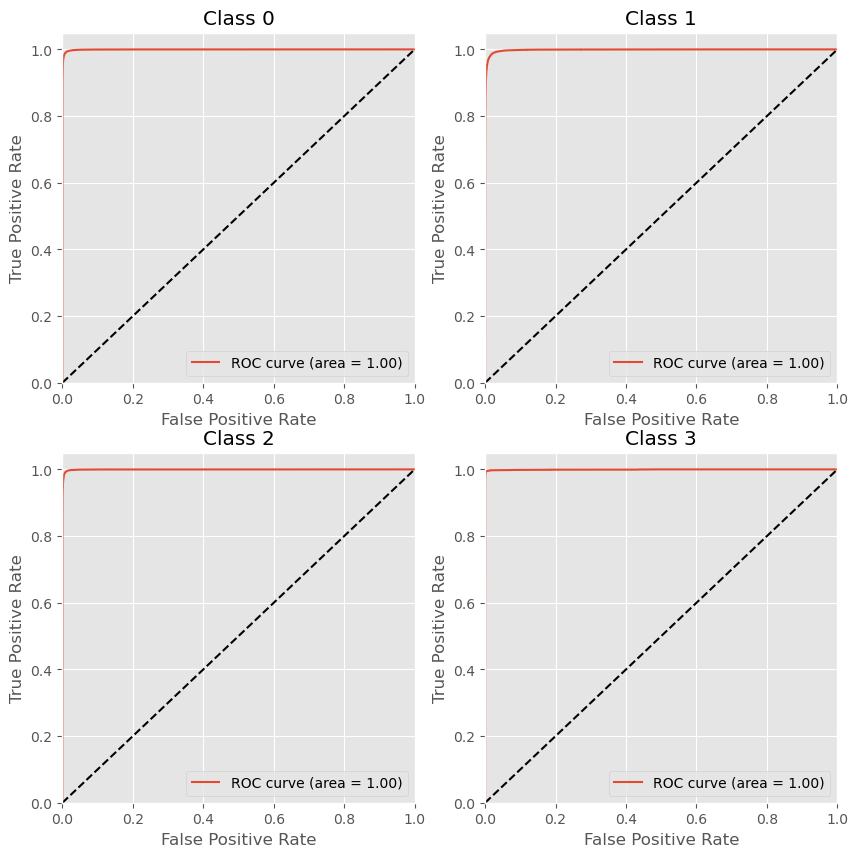

roc_auc_score:  0.9991958073311366
accuracy 0.9841560412696022


In [174]:
predict = pd.DataFrame(xgb_model.predict(X_test))
result = pd.concat([y_test.reset_index(),predict],axis = 1)
result= result[['혼잡도',0]]
result.columns =['actual','predict']

acc = accuracy_score(result['actual'], result['predict'])


labels = [0, 1, 2, 3]
y_test_roc = label_binarize(y_test, classes=labels)
y_pred = xgb_model.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(10, 10))
for idx, i in enumerate(range(n_classes)):
    idx = idx+1
    plt.subplot(2,2,idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % (idx-1))
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test_roc, y_pred, multi_class='raise'))
print(f'accuracy {acc}')
